## Importing libraries

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Preprocessing

In [188]:
np.random.seed(99)

segmentOne=np.random.randn(2000//3,2)+np.array([2,2])
segmentTwo=np.random.randn(2000//3,2)+np.array([-3,-3])
segmentThree=np.random.randn(2000//3,2)+np.array([-5,3])

In [189]:
X=np.concatenate((segmentOne,segmentTwo,segmentThree))

In [190]:
X.shape

(1998, 2)

## Model

### Initialize clusters randomly

In [191]:
k=3

In [192]:
init=X[np.argmax(np.mean(X,axis=1))]


In [193]:
def distanceProbability(X,initialPoint):
    distance=np.array([])
    for i in X:
        distance=np.append(distance,np.linalg.norm(i-initialPoint))
    distanceSum=np.sum(distance)
    probability=[x/distanceSum for x in distance]
    return probability

In [194]:
weights=distanceProbability(X,init)

In [195]:
centers=X[np.random.choice(X.shape[0],size=k,p=weights)]

### Plot clusters

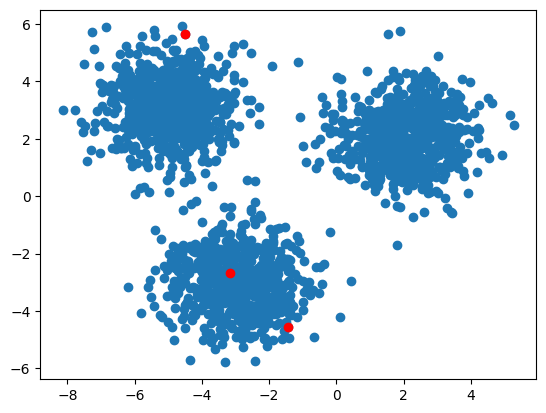

In [196]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],c='red')

### Find points's clusters and find new clusters

In [197]:
def reCluster(X,centers):
    clusters=np.array([])
    for i in X:
        distance=[np.linalg.norm(x-i) for x in centers]
        clusters=np.append(clusters,np.argmin(distance))
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=clusters)
    plt.scatter(centers[:,0],centers[:,1],c='red')
    plt.show()
    newCenters=np.array([])
    for i in range(k):
        newCenters=np.append(newCenters,np.array(np.mean(X[clusters==i],axis=0)))
    newCenters=newCenters.reshape(-1,X.shape[1])
    return newCenters

### Loop until convergence

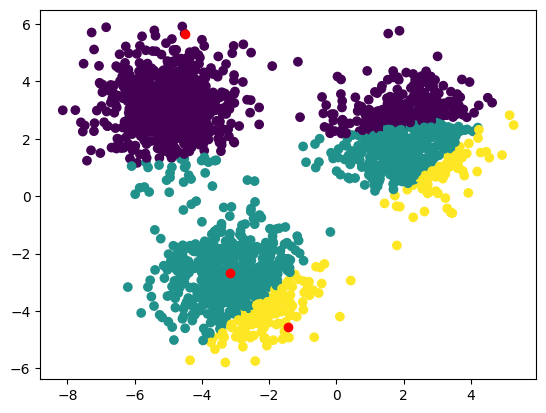

[[-3.02273396  3.17773954]
 [-1.28667891 -0.95841038]
 [-0.32147694 -2.51232662]]


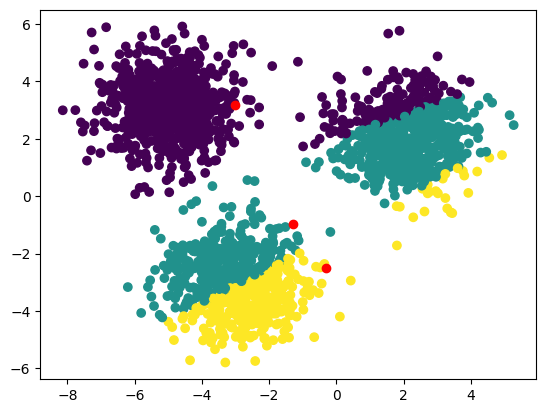

[[-3.7752993   3.14300963]
 [-0.14642583  0.0843926 ]
 [-2.08343303 -3.45159184]]


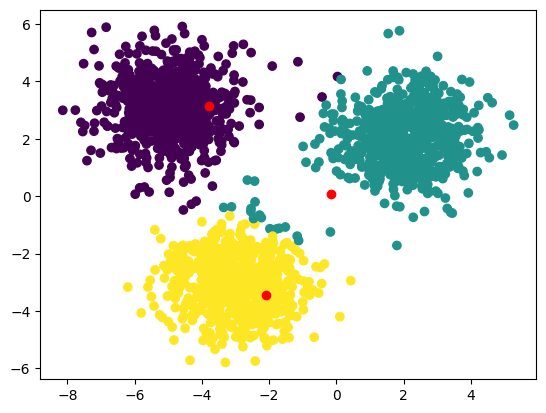

[[-4.94261357  3.10414476]
 [ 1.95863011  1.98666189]
 [-2.97553307 -3.07624771]]


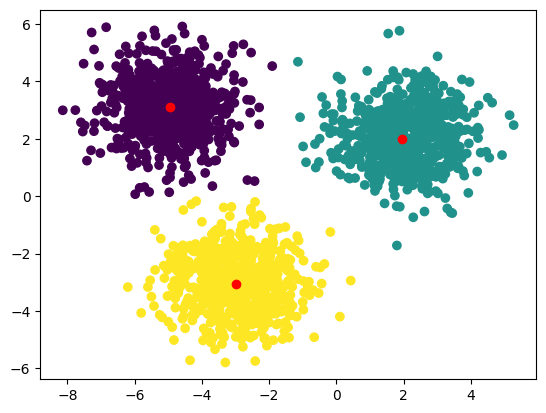

[[-4.96385576  3.10785357]
 [ 2.04620192  2.06562301]
 [-2.96031806 -3.01369273]]


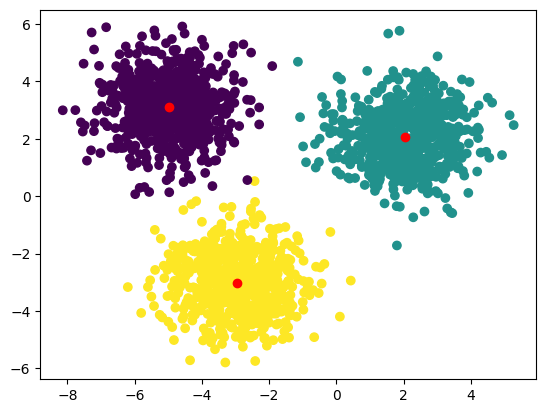

[[-4.96766311  3.11173532]
 [ 2.04620192  2.06562301]
 [-2.95952594 -3.00838511]]


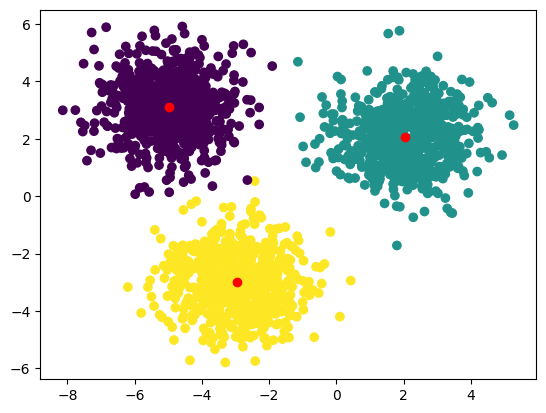

Convergence in : 5 iterations


In [198]:
count=0
for _ in range(10):
    prev=centers
    centers=reCluster(X,centers)
    if np.array_equal(prev,centers):
        break
    print(centers)
    count+=1
print(f"Convergence in : {count} iterations")